In [82]:
import warnings
# warnings.filterwarnings("ignore", category=FutureWarning) 

def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [83]:
import os
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [85]:
brand_out_file_name = 'unique_vendor_brand.csv'
sku_file_name = 'sku_min_max_prices.csv'

res_df = pd.DataFrame(columns=['file', 'vendor_unique_number', 'brand_unique_number'])
res_sku_df = pd.DataFrame(columns=['SKU', 'min_price', 'max_price'])

sku_dict = pd.read_csv("./csv/sku_dict.csv")
sku_dict.rename(columns={'sku_id': 'SKU'}, inplace=True)

for file_name in os.listdir('./csv'):
    if file_name.endswith('_group_sku.csv'):
        
        gr_sku = pd.read_csv("./csv/"+file_name)

        gr_sku = \
        gr_sku.groupby('SKU').agg(min_price = ('price_per_sku', 'min'),
                                  max_price = ('price_per_sku', 'max')).reset_index()

        inner_sku = sku_dict.merge(gr_sku, on='SKU', how='inner')

        tmp_df= \
        {'file': file_name, 
         'vendor_unique_number': inner_sku.vendor.nunique(), 
         'brand_unique_number' : inner_sku.brand_code.nunique()}

        res_df = res_df.append(tmp_df, ignore_index=True)
        
        res_sku_df = res_sku_df.append(inner_sku[['SKU', 'min_price', 'max_price']],  ignore_index=True)


os.makedirs('./results/', exist_ok=True)        
res_df.to_csv('./results/'+brand_out_file_name, index=False)        
res_sku_df.to_csv('./results/'+sku_file_name, index=False)        
   
    
res_sku_df    

,SKU,min_price,max_price
0,32950,422.9750,486.325
1,78833,295.8300,324.450
2,64619,142.8534,153.704
3,83329,75.0321,90.600
4,17812,61.0640,78.192
5,10334,79.1504,102.781
6,43678,116.5312,151.474
7,57561,77.9744,101.829
8,68211,147.7683,166.056
9,90611,73.2368,96.474


In [150]:
res_df

,file,vendor_unique_number,brand_unique_number
0,first_group_sku.csv,2,1
1,second_group_sku.csv,9,1
2,third_group_sku.csv,8,1


## First Group

In [208]:
file_name = 'first_group_sku.csv'
gr_sku = pd.read_csv("./csv/"+file_name)
gr_sku['dates'] = pd.to_datetime(gr_sku.dates)

gr_sku['price_per_sku_ffill'] = gr_sku.groupby('SKU').price_per_sku.ffill()

<AxesSubplot:xlabel='dates'>

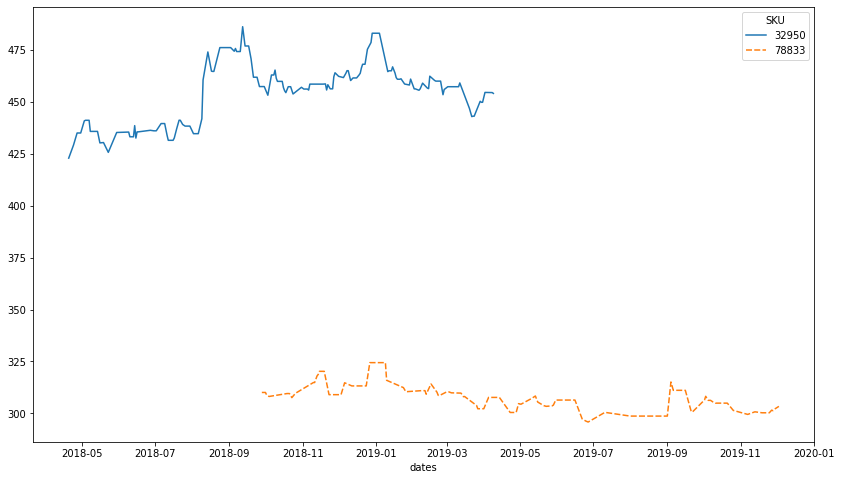

In [210]:
pivot_t = gr_sku.pivot_table(index='dates', columns='SKU', values='price_per_sku_ffill')

plt.figure(figsize = (14,8))
sns.lineplot(data = pivot_t)

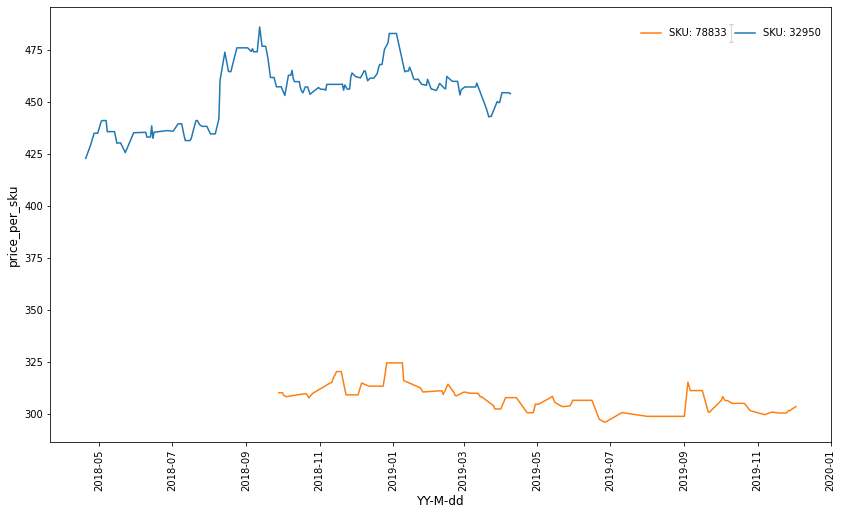

In [211]:
plt.rcParams["figure.figsize"] = (14, 8)
fig, ax = plt.subplots()

for sku in gr_sku.SKU.unique():
    g=sns.lineplot(x='dates', y='price_per_sku_ffill', ax=ax, data=gr_sku[gr_sku.SKU==sku])

plt.ylabel('price_per_sku', fontsize=12)
plt.xlabel('YY-M-dd', fontsize=12)
plt.xticks(rotation='vertical')
fig.legend(labels=['SKU: %s' %str(sku) for sku in gr_sku.SKU.unique()],
           bbox_to_anchor=(0.8,0.85), borderaxespad=0, 
           mode="expand", ncol=2)
plt.show()

In [267]:
gr_sku

,dates,SKU,price_per_sku,num_purchases,price_per_sku_ffill
0,2018-04-20,32950,422.975,3,422.975
1,2018-04-24,32950,429.275,3,429.275
2,2018-04-27,32950,435.100,3,435.100
3,2018-04-30,32950,NaN,1,435.100
4,2018-05-03,32950,440.950,2,440.950
...,...,...,...,...,...
240,2019-11-25,78833,NaN,1,300.285
241,2019-11-27,78833,301.560,2,301.560
242,2019-11-28,78833,301.305,2,301.305
243,2019-11-29,78833,301.920,1,301.920


In [275]:
gr_sku.describe()

,SKU,price_per_sku,num_purchases,price_per_sku_ffill
count,245.000000,169.000000,245.000000,245.000000
mean,50928.644898,398.897189,1.473469,397.214653
std,22444.120996,72.649957,0.662452,72.738444
min,32950.000000,295.830000,1.000000,295.830000
25%,32950.000000,309.225000,1.000000,309.555000
50%,32950.000000,438.650000,1.000000,437.150000
75%,78833.000000,459.975000,2.000000,459.225000
max,78833.000000,486.325000,3.000000,486.325000


In [273]:
res = gr_sku[['SKU', 'price_per_sku']].groupby(['SKU']).agg(nulls_count=('price_per_sku', 
                                                                         lambda x: x.isnull().sum(axis=0))
                                                           ).reset_index()
res

,SKU,nulls_count
0,32950,44
1,78833,32


In [274]:
res.to_csv('./results/first_sku_price_missings.csv', index=False)        

## Second Group

In [4]:
import datetime
import calendar

def getDateFromWeekNum(y,w):
    d = "{}-W{}".format(y,w)
    r = datetime.datetime.strptime(d + '-1', "%G-W%V-%u") #%G-W%V-%u #%Y-W%W-%w
    return pd.to_datetime(r)

In [616]:
promo_file = 'promo_1510002.csv'
promo_df = pd.read_csv("./csv/"+promo_file)
promo_df['BeginWeek'] = promo_df[['year', 'week_num']].apply(lambda x: 
                                                         getDateFromWeekNum(x['year'],x['week_num']), 
                                                         axis=1)
promo_df.head(10)

,year,week_num,SKU,discount,BeginWeek
0,2019,1,90611,0.90,2018-12-31
1,2019,2,10334,0.90,2019-01-07
2,2019,3,68211,0.90,2019-01-14
3,2019,4,10334,0.90,2019-01-21
4,2019,5,72784,0.80,2019-01-28
5,2019,6,68211,0.90,2019-02-04
6,2019,7,38767,0.90,2019-02-11
7,2019,8,83329,0.90,2019-02-18
8,2019,9,83329,0.95,2019-02-25
9,2019,10,90611,0.90,2019-03-04


In [532]:
promo_df.describe()

,year,week_num,SKU,discount
count,52.0,52.000000,52.000000,52.000000
mean,2019.0,26.500000,47268.653846,0.897115
std,0.0,15.154757,27554.128483,0.052779
min,2019.0,1.000000,10334.000000,0.800000
25%,2019.0,13.750000,17812.000000,0.900000
50%,2019.0,26.500000,43678.000000,0.900000
75%,2019.0,39.250000,69997.000000,0.950000
max,2019.0,52.000000,90611.000000,0.950000


In [534]:
print(calendar.month(2019,12))

   December 2019
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30 31



In [538]:
getDateFromWeekNum(2019,53)

Timestamp('2019-12-30 00:00:00')

In [492]:
ddt = pd.to_datetime('2019-01-03')
ddt.week, ddt.weekday(), ddt.to_period('W-SUN').start_time, ddt.to_period('W-MON').start_time

(1, 3, Timestamp('2018-12-31 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [659]:
ddt = pd.to_datetime('2018-12-30')
ddt.weekofyear, ddt.isocalendar()

(52, (2018, 52, 7))

## Export Grouped Stat

In [668]:
res = promo_df.groupby('SKU').agg(promo_count=('discount', 'count')).reset_index()
res.to_csv('./results/second_sku_promo_count.csv', index=False)        

In [618]:
res

,SKU,promo_count
0,10334,8
1,17812,8
2,36096,3
3,38767,5
4,43678,4
5,57561,7
6,64619,1
7,68211,2
8,69997,2
9,72784,3


In [695]:
file_name = 'second_group_sku.csv'
gr_sku = pd.read_csv("./csv/"+file_name)
gr_sku['dates'] = pd.to_datetime(gr_sku.dates)

gr_sku['year'] = gr_sku.dates.dt.year.astype(int) 
gr_sku['week_num'] = gr_sku.dates.dt.week.astype(int)  
gr_sku['BeginWeek'] = np.where(gr_sku.dates.dt.weekday==0, # offset on Non Mondays only
                               gr_sku['dates'], 
                               gr_sku['dates']-pd.to_timedelta(gr_sku['dates'].dt.dayofweek, unit='d')
                              ) 

# gr_sku['BeginWeek'] = gr_sku.dates.dt.to_period('W-SUN').dt.start_time

gr_sku['price_per_sku_ffill'] = gr_sku.groupby('SKU').price_per_sku.ffill()

gr_sku_part = gr_sku[['SKU', 'dates', 'BeginWeek', 'year', 'week_num', 'num_purchases']]

# inner_sku = gr_sku_part.merge(promo_df[['SKU', 'year', 'week_num', 'BeginWeek', 'discount']], 
#                               on=['SKU', 'BeginWeek'], 
#                               how='left')

inner_sku = gr_sku_part.merge(promo_df[['SKU', 'year', 'week_num', 'BeginWeek', 'discount']], 
                              on=['SKU', 'year', 'week_num'], 
                              how='left')


In [669]:
inner_sku.loc[(~inner_sku.discount.isnull())&(inner_sku.dates=='2018-12-31')].head(30)

,SKU,dates,BeginWeek,year_x,week_num_x,num_purchases,year_y,week_num_y,discount
3411,90611,2018-12-31,2018-12-31,2018,1,5,2019.0,1.0,0.9


In [696]:
gr_sku_part.shape, inner_sku.shape

((3749, 6), (3749, 8))

In [544]:
inner_sku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 3748
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SKU            3749 non-null   int64         
 1   BeginWeek      3749 non-null   datetime64[ns]
 2   num_purchases  3749 non-null   int64         
 3   discount       273 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 146.4 KB


In [674]:
mean_num_purchases_promo    = inner_sku.loc[(~inner_sku.discount.isnull()), ['SKU','num_purchases']].groupby(['SKU']) \
                                       .agg(mean_num_purchases_promo=('num_purchases',np.mean)).reset_index()
mean_num_purchases_wo_promo = inner_sku.loc[(inner_sku.discount.isnull()), ['SKU','num_purchases']].groupby(['SKU']) \
                                       .agg(mean_num_purchases_wo_promo=('num_purchases',np.mean)).reset_index()


In [675]:
out = mean_num_purchases_promo.merge(mean_num_purchases_wo_promo, on='SKU', how='outer')
# out = out.fillna(0)
# out.mean_num_purchases_promo    = out.mean_num_purchases_promo.apply(lambda x: int(np.round(x)))
# out.mean_num_purchases_wo_promo = out.mean_num_purchases_wo_promo.apply(lambda x: int(np.round(x)))

out

,SKU,mean_num_purchases_promo,mean_num_purchases_wo_promo
0,10334,11.977778,9.980050
1,17812,5.934783,3.613636
2,36096,12.923077,11.414634
3,38767,10.222222,9.000000
4,43678,12.090909,9.448276
5,57561,9.727273,8.050378
6,64619,5.800000,4.329897
7,68211,13.111111,11.459350
8,69997,7.818182,4.333333
9,72784,9.133333,6.953782


## Export Grouped Stat

In [676]:
out.to_csv('./results/second_sku_sales_comparison.csv', index=False) 

## Plot Price_Per_SKU

<AxesSubplot:xlabel='dates'>

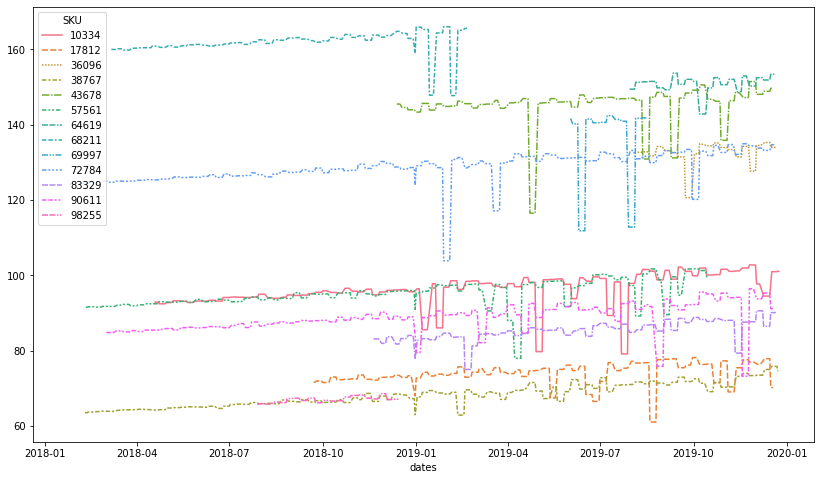

In [281]:
pivot_t = gr_sku.pivot_table(index='dates', columns='SKU', values='price_per_sku_ffill')

plt.figure(figsize = (14,8))
sns.lineplot(data = pivot_t)

## Third Group

In [7]:
promo_file = 'conc_df.csv'
conc_df = pd.read_csv("./csv/"+promo_file)
conc_df['BeginWeek'] = conc_df[['year', 'week_num']].apply(lambda x: 
                                                         getDateFromWeekNum(x['year'],x['week_num']), 
                                                         axis=1)

# conc_df['price_per_sku'] = conc_df.groupby('SKU').price_per_sku.ffill()


In [6]:
conc_df

,SKU,year,week_num,ret_net_code,price_per_sku,BeginWeek
0,84395,2019,18,1,164.69400,2019-04-29
1,84395,2019,18,2,164.69400,2019-04-29
2,84395,2019,18,3,134.50010,2019-04-29
3,84395,2019,22,1,165.19800,2019-05-27
4,84395,2019,22,2,136.28835,2019-05-27
...,...,...,...,...,...,...
3004,89272,2019,18,2,133.93820,2019-04-29
3005,89272,2019,18,3,121.76200,2019-04-29
3006,80308,2019,47,1,115.77984,2019-11-18
3007,80308,2019,47,2,118.19192,2019-11-18


In [9]:
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SKU            3009 non-null   int64         
 1   year           3009 non-null   int64         
 2   week_num       3009 non-null   int64         
 3   ret_net_code   3009 non-null   int64         
 4   price_per_sku  3009 non-null   float64       
 5   BeginWeek      3009 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 141.2 KB


In [10]:
res = conc_df.groupby('SKU').agg(conc_rows_count=('price_per_sku', 'count')).reset_index()
res.to_csv('./results/third_sku_competitor_count.csv', index=False) 
res

,SKU,conc_rows_count
0,11050,384
1,19632,147
2,24125,93
3,49661,387
4,54404,384
5,60870,105
6,80308,453
7,80631,261
8,84395,399
9,89272,396


In [73]:
conc_df_gr = conc_df.groupby(['SKU', 'year', 'week_num']).agg(min_conc_price=('price_per_sku','min')).reset_index()
conc_df_gr.shape


(370, 4)

In [74]:
file_name = 'third_group_sku.csv'
gr_sku = pd.read_csv("./csv/"+file_name)
gr_sku['dates'] = pd.to_datetime(gr_sku.dates)

gr_sku['year']     = gr_sku.dates.dt.year.astype(int) #.dt.isocalendar().year 
gr_sku['week_num'] = gr_sku.dates.dt.week.astype(int) #.dt.isocalendar().week 
# gr_sku['BeginWeek'] = np.where(gr_sku.dates.dt.weekday==0, # offset on Non Mondays only
#                                gr_sku['dates'], 
#                                gr_sku['dates']-pd.to_timedelta(gr_sku['dates'].dt.dayofweek, unit='d')
#                               ) 

# gr_sku['BeginWeek'] = gr_sku.dates.dt.to_period('W-SUN').dt.start_time

# gr_sku['price_per_sku'] = gr_sku.groupby('SKU').price_per_sku.ffill()

gr_sku_part = gr_sku[['SKU', 'year', 'week_num', 'num_purchases', 'price_per_sku']]

# inner_sku = gr_sku_part.set_index(['SKU', 'year', 'week_num'])\
#                        .join(conc_df[['SKU', 'year', 'week_num', 'price_per_sku']].set_index(['SKU', 'year', 'week_num']), 
#                              on=['SKU', 'year', 'week_num'], 
#                              how='inner',
#                              lsuffix='_x'
#                             )

inner_sku = gr_sku_part.merge(conc_df_gr, 
                              on=['SKU', 'year', 'week_num'], 
                              how='inner')

# inner_sku = inner_sku.reset_index()


In [75]:
gr_sku_part.shape, inner_sku.shape

((2781, 5), (1749, 6))

In [76]:
inner_sku

,SKU,year,week_num,num_purchases,price_per_sku,min_conc_price
0,11050,2019,1,9,105.475,101.25600
1,11050,2019,1,9,105.475,101.25600
2,11050,2019,1,8,105.475,101.25600
3,11050,2019,1,7,105.475,101.25600
4,11050,2019,1,8,105.475,101.25600
...,...,...,...,...,...,...
1744,89272,2019,51,5,124.996,119.99616
1745,89272,2019,51,6,124.996,119.99616
1746,89272,2019,51,5,124.996,119.99616
1747,89272,2019,51,6,124.996,119.99616


In [77]:
out = inner_sku.groupby('SKU').apply(lambda x: sum(x['price_per_sku'] <= 
                                                   x['min_conc_price'])).reset_index()
out.rename(columns={0:'lowest_price_rows_count'}, inplace=True)
out

,SKU,lowest_price_rows_count
0,11050,0
1,19632,0
2,24125,0
3,49661,3
4,54404,13
5,60870,0
6,80308,0
7,80631,0
8,84395,14
9,89272,7


In [79]:
part = out[out.lowest_price_rows_count>0]
part.to_csv('./results/third_sku_le_price.csv', index=False) 

<AxesSubplot:xlabel='dates'>

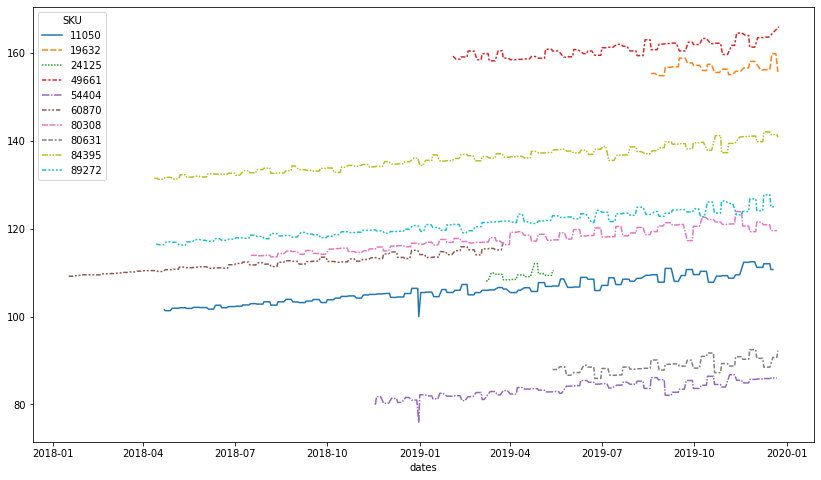

In [734]:
pivot_t = gr_sku.pivot_table(index='dates', columns='SKU', values='price_per_sku')

plt.figure(figsize = (14,8))
sns.lineplot(data = pivot_t)